In [1]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris_data = np.genfromtxt('iris.csv', delimiter=',', usecols=(0,1,2,3))
iris_data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, iris_data)

In [3]:
som = MiniSom(25, 25, 4, sigma = 1.0, learning_rate = 0.1)
som.random_weights_init(iris_data)
som.train_random(iris_data, 1000)

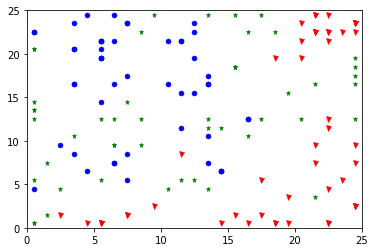

In [4]:


target = np.genfromtxt('iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

markers = ['v', '*', 'o']
colors = ['r', 'g', 'b']
for cnt, xx in enumerate(iris_data):
    w = som.winner(xx)  # getting the winner
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor=colors[t[cnt]],
             markeredgecolor=colors[t[cnt]], markersize=5, markeredgewidth=0.5)
plt.axis([0, 25, 0, 25])
plt.show()